In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/insaid_task/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 1. Data cleaning including missing values, outliers and multi-collinearity.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df['isFlaggedFraud']=df['isFlaggedFraud'].astype(str)
df['isFraud']=df['isFraud'].astype(str)

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

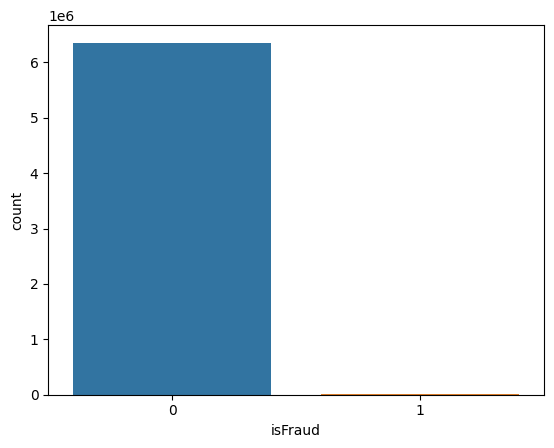

In [7]:
import seaborn as sns
sns.countplot(x='isFraud',data = df)

In [8]:
df['isFraud'].value_counts()
print('total number of non fraudulent transactions ::',df['isFraud'].value_counts()[0])
print('total number of fraudulent transactions ::',df['isFraud'].value_counts()[1])
print('percentage of non fraudulent transactions ::',df['isFraud'].value_counts()[0]/len(df)*100)
print('percentage of fraudulent transactions ::',df['isFraud'].value_counts()[1]/len(df)*100)

total number of non fraudulent transactions :: 6354407
total number of fraudulent transactions :: 8213
percentage of non fraudulent transactions :: 99.87091795518198
percentage of fraudulent transactions :: 0.12908204481801522


Observation : dataset is fully imbalanced as 99.87% of transactions are legit.

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

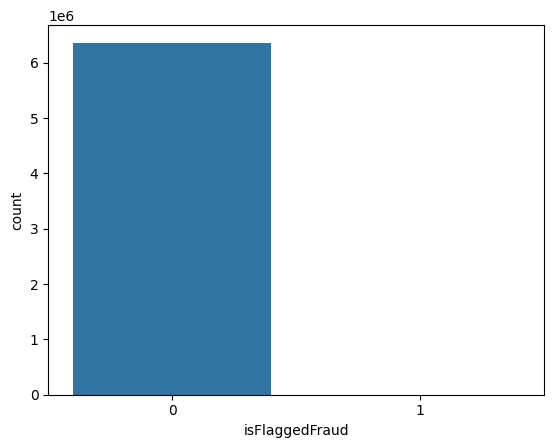

In [9]:
sns.countplot(x='isFlaggedFraud',data = df)

In [10]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<Axes: xlabel='amount', ylabel='isFraud'>

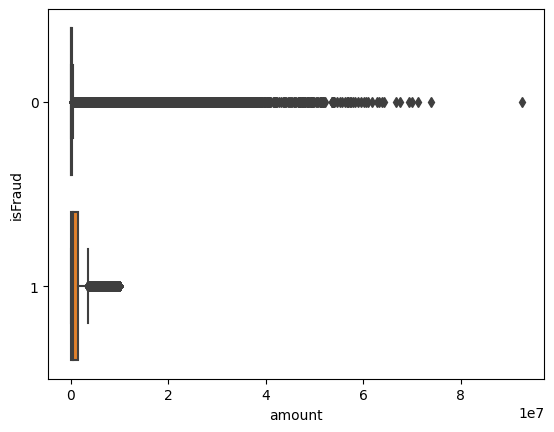

In [11]:
sns.boxplot(data=df, x="amount", y="isFraud")

<Axes: xlabel='amount', ylabel='isFlaggedFraud'>

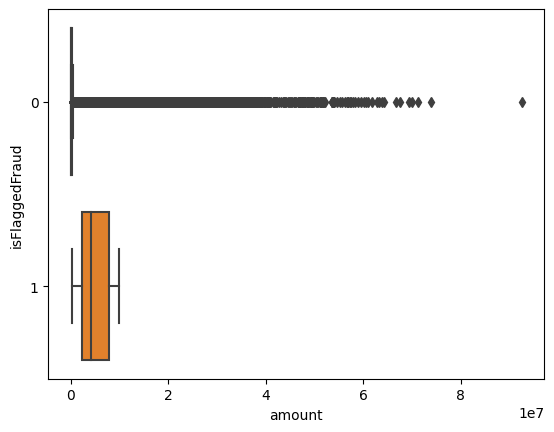

In [12]:
sns.boxplot(data=df, x="amount", y="isFlaggedFraud")

<Axes: xlabel='oldbalanceOrg'>

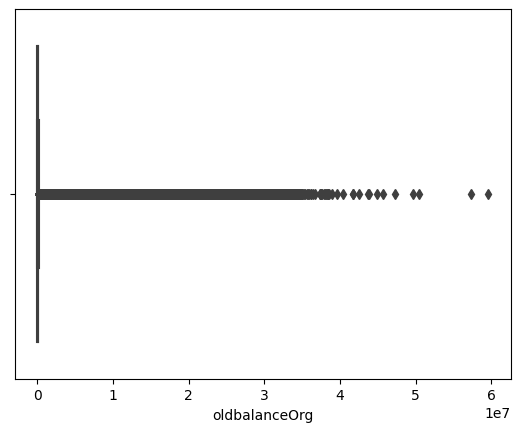

In [13]:
sns.boxplot(data=df,x='oldbalanceOrg')

<Axes: xlabel='newbalanceOrig'>

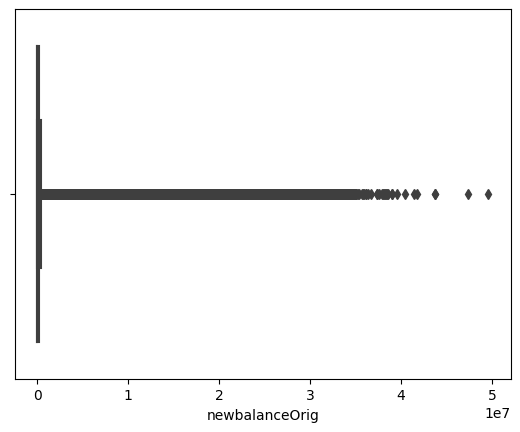

In [14]:
sns.boxplot(data=df,x='newbalanceOrig')

<Axes: xlabel='oldbalanceDest'>

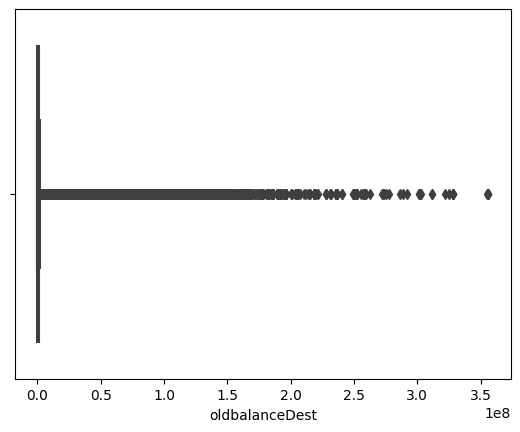

In [15]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

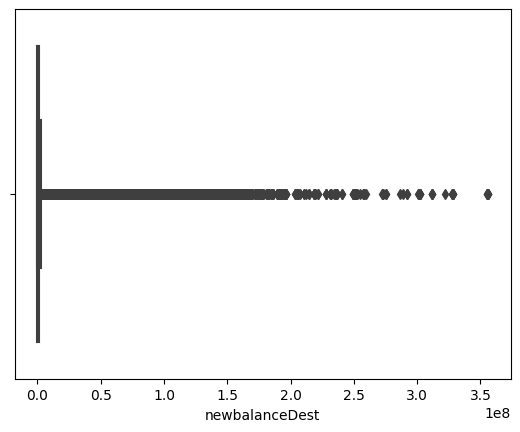

In [16]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='type', ylabel='count'>

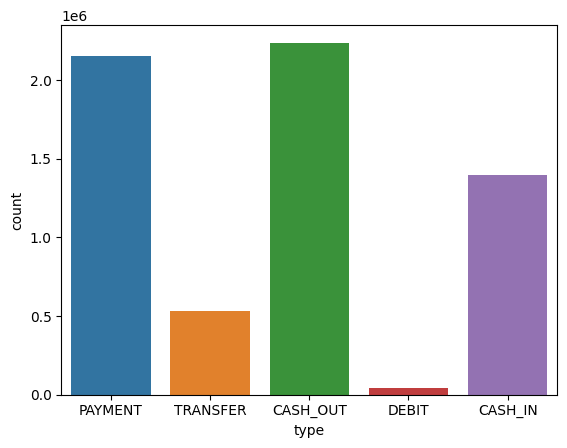

In [17]:
sns.countplot(x='type',data =df)

In [18]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [19]:
import numpy as np

In [20]:
def outlier_remover(dataframe, columns_name):
  q3, q1 = np.percentile(dataframe[columns_name], [75 ,25])
  iqr = q3 - q1
  lower_range = q1-1.5*iqr
  upper_range = q3+1.5*iqr
  dataframe = dataframe[(dataframe[columns_name]<upper_range)&(dataframe[columns_name]>lower_range)]
  return dataframe


In [21]:
df_amt_rm_ot = outlier_remover(df, 'amount')
print(df_amt_rm_ot.isFraud.value_counts())

df_obd_rm_ot = outlier_remover(df_amt_rm_ot, 'oldbalanceDest')
print(df_obd_rm_ot.isFraud.value_counts())

df_nbd_rm_ot = outlier_remover(df_obd_rm_ot, 'newbalanceDest')
print(df_nbd_rm_ot.isFraud.value_counts())

df_obo_rm_ot = outlier_remover(df_nbd_rm_ot, 'oldbalanceOrg')
print(df_obo_rm_ot.isFraud.value_counts())

df_nbo_rm_ot = outlier_remover(df_obo_rm_ot, 'newbalanceOrig')
print(df_nbo_rm_ot.isFraud.value_counts())
df_nbo_rm_ot.shape


0    6020183
1       4359
Name: isFraud, dtype: int64
0    5262780
1       4098
Name: isFraud, dtype: int64
0    4837551
1       3942
Name: isFraud, dtype: int64
0    4050381
1       2902
Name: isFraud, dtype: int64
0    3347553
1       2902
Name: isFraud, dtype: int64


(3350455, 11)

Observation : after removing the outliers in the numerical columns we have got less fraudulant transactions. As fraudulant transactions are out of the distribution with respect to legit transactions in most the cases.
So taking only main dataframe for further analysis

<Axes: xlabel='oldbalanceDest'>

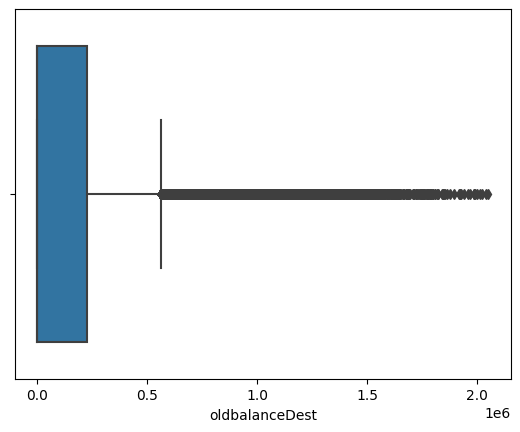

In [22]:
sns.boxplot(data=df_nbo_rm_ot,x='oldbalanceDest')

In [23]:
df_merchants = df[df['nameDest'].str.contains('M')]
df_merchants.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [24]:
df_merchants.isFraud.value_counts()

0    2151495
Name: isFraud, dtype: int64

Observation : no transaction destined/recipient to merchant is fraud so we can remove this data when doing analysis or model building to classify if a transaction is fraud or not. Will take only customer data for analysis.

<Axes: xlabel='type', ylabel='count'>

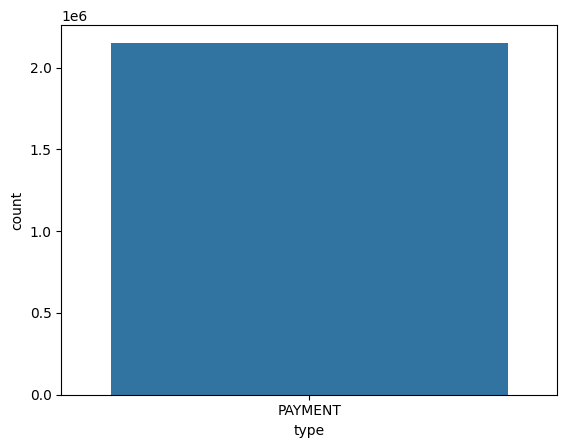

In [25]:
sns.countplot(x='type',data =df_merchants)

Observation : All the transactions made by merchants are payment only

In [26]:
df_customers=df[~df['nameDest'].str.contains('M')]

In [27]:
df_customers.sample(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5573784,393,CASH_OUT,609788.50,C1158666251,0.00,0.00,C871392839,705564.98,1315353.48,0,0
3642573,275,CASH_OUT,185441.69,C628495592,11687.00,0.00,C275847203,3158487.82,3343929.52,0,0
1982760,179,TRANSFER,694640.63,C104214941,30858.00,0.00,C1151830195,141218.27,835858.90,0,0
1623945,157,TRANSFER,460113.76,C28087812,84295.00,0.00,C1164807049,61644.79,521758.55,0,0
3155104,237,TRANSFER,1460079.95,C527676159,0.00,0.00,C1365285640,2334608.33,3794688.28,0,0
4158487,304,CASH_OUT,368542.09,C762674388,11285.00,0.00,C1114689792,1960818.19,2329360.28,0,0
4964020,351,CASH_OUT,5729.06,C777768412,31596.00,25866.94,C84144534,3069.09,8798.15,0,0
5010659,353,CASH_OUT,177665.68,C999483714,11797.00,0.00,C339900677,351849.19,529514.87,0,0
5009659,353,CASH_OUT,81382.07,C139949597,0.00,0.00,C1228420781,156459.89,237841.96,0,0
2455309,203,CASH_IN,196746.07,C913187903,1900462.54,2097208.61,C948079082,715797.74,758375.36,0,0


<ipython-input-28-45f9b45356de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_customers.corr()


<Axes: >

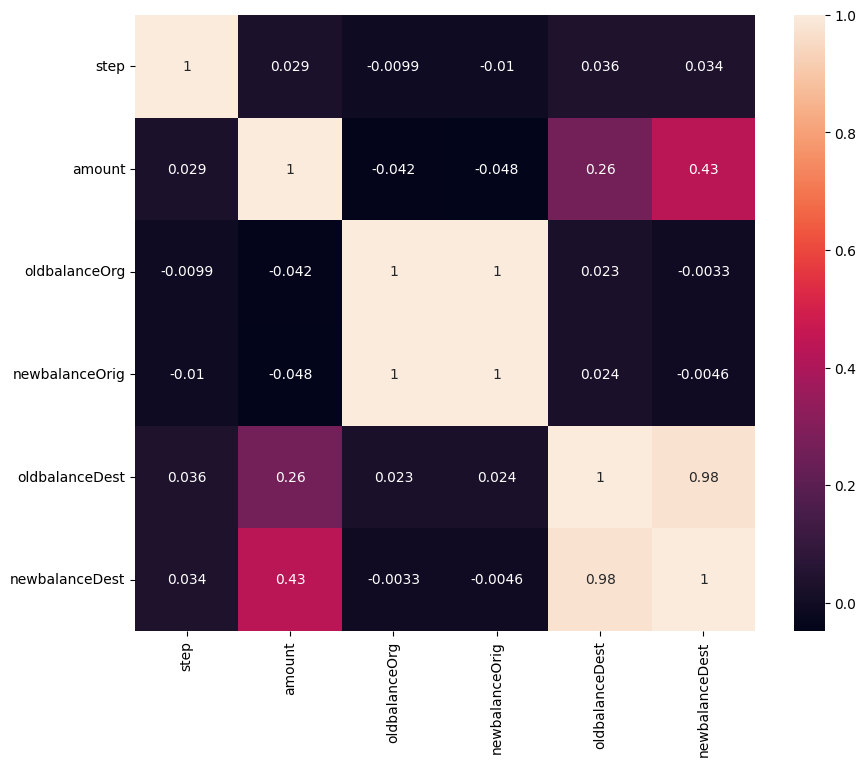

In [28]:
import matplotlib.pyplot as plt
corr=df_customers.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [29]:
df_customers.isFraud.value_counts()

0    4202912
1       8213
Name: isFraud, dtype: int64

In [30]:
df_customers.isFlaggedFraud.value_counts()

0    4211109
1         16
Name: isFlaggedFraud, dtype: int64

In [31]:
df.shape,df.isFraud.value_counts()

((6362620, 11),
 0    6354407
 1       8213
 Name: isFraud, dtype: int64)

<Axes: xlabel='type', ylabel='count'>

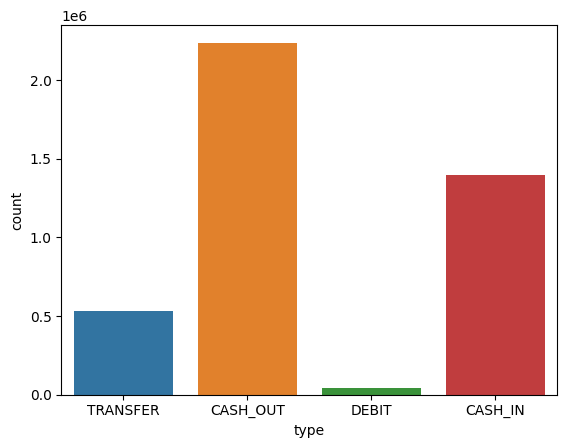

In [32]:
sns.countplot(x='type',data =df_customers)

Observation : Customers haven't made any transaction with payment type

In [33]:
print (df_customers.head())

    step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2      1  TRANSFER     181.00  C1305486145          181.0            0.00   
3      1  CASH_OUT     181.00   C840083671          181.0            0.00   
9      1     DEBIT    5337.77   C712410124        41720.0        36382.23   
10     1     DEBIT    9644.94  C1900366749         4465.0            0.00   
15     1  CASH_OUT  229133.94   C905080434        15325.0            0.00   

      nameDest  oldbalanceDest  newbalanceDest isFraud isFlaggedFraud  
2   C553264065             0.0            0.00       1              0  
3    C38997010         21182.0            0.00       1              0  
9   C195600860         41898.0        40348.79       0              0  
10  C997608398         10845.0       157982.12       0              0  
15  C476402209          5083.0        51513.44       0              0  


In [34]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211125 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
 10  isFlaggedFraud  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 385.5+ MB


### Multicollinearity

<ipython-input-35-74c0551aac88>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_customers.corr()


<Axes: >

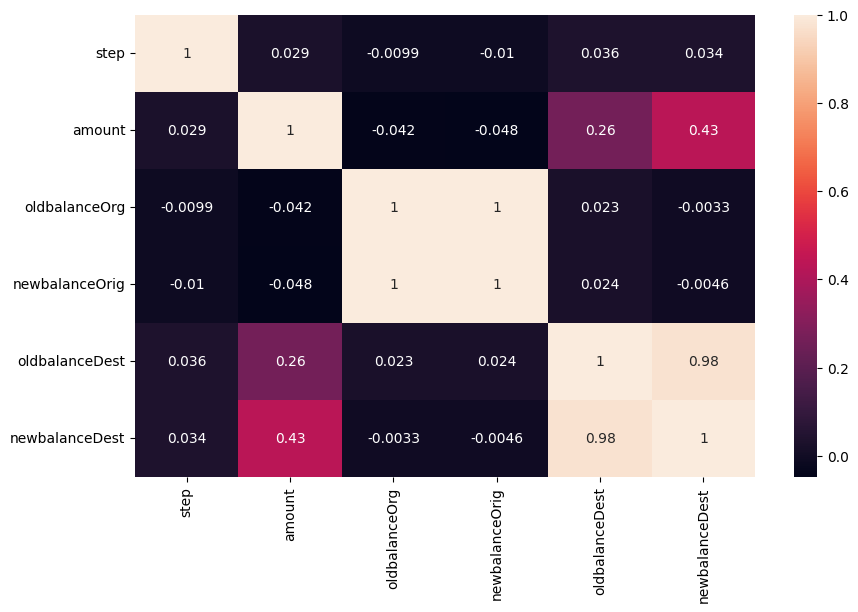

In [35]:
# #VIF (VARIANCE INFLATION FACTOR)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(df):
#     vif = pd.DataFrame()
#     vif["variables"] = df.columns
#     vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#     return(vif)

# calc_vif(df_customers)
corr=df_customers.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

Observation: for 2 combinations like oldbalanceOrg,newbalanceOrig and oldbalanceDest,newbalanceDest Vif values are high. So doing feature extraction on those variables




In [36]:
df_customers['Actual_amount_orig'] = df_customers['oldbalanceOrg'] - df_customers['newbalanceOrig']
df_customers['Actual_amount_dest'] = df_customers['oldbalanceDest'] - df_customers['newbalanceDest']
df_customers['TransactionPath'] = df_customers['nameOrig'] + df_customers['nameDest']
# print(calc_vif(df_customers))

<ipython-input-36-305220dc809d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Actual_amount_orig'] = df_customers['oldbalanceOrg'] - df_customers['newbalanceOrig']
<ipython-input-36-305220dc809d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Actual_amount_dest'] = df_customers['oldbalanceDest'] - df_customers['newbalanceDest']
<ipython-input-36-305220dc809d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [37]:
df_customers_cleaned = df_customers.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
# print(calc_vif(df_customers_cleaned))

<ipython-input-38-33ef47281b0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_customers_cleaned.corr()


<Axes: >

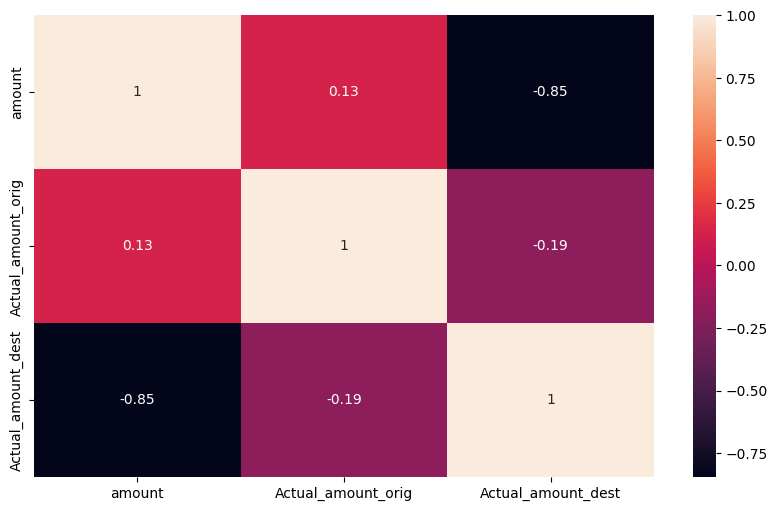

In [38]:
corr=df_customers_cleaned.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [40]:
objectList = list(df_customers_cleaned.select_dtypes(include = "object").columns)
print (objectList)

['type', 'isFraud', 'isFlaggedFraud', 'TransactionPath']


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for feat in objectList:
    df_customers_cleaned[feat] = encoder.fit_transform(df_customers_cleaned[feat].astype(str))

In [42]:
X = df_customers_cleaned.drop(columns = ['isFraud'])
y = df_customers_cleaned['isFraud']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (2821453, 6)
Shape of X_test:  (1389672, 6)


In [43]:
# objectList.remove('isFraud')
# for feat in objectList:
#     x_train[feat] = encoder.fit_transform(x_train[feat].astype(str))
# print(df_customers_cleaned.info())

# for feat in objectList:
#     x_test[feat] = encoder.transform(x_test[feat].astype(str))
# print(df_customers_cleaned.info())

In [44]:
scaler = StandardScaler()
x_train["NormalizedAmount"] = scaler.fit_transform(x_train["amount"].values.reshape(-1, 1))
x_test["NormalizedAmount"] = scaler.transform(x_test["amount"].values.reshape(-1, 1))

In [45]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

Y_pred_dt = decision_tree.predict(x_test)
decision_tree_score = decision_tree.score(x_test, y_test) * 100

In [46]:
%time
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train)

Y_pred_rf = random_forest.predict(x_test)
random_forest_score = random_forest.score(x_test, y_test) * 100

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [47]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.88515275547036
Random Forest Score:  99.937107461329


Observation:
Decision Tree Score:  99.88515275547036,
Random Forest Score:  99.937107461329  accuracy of Random Forest is more compared to Decision Tree classifier

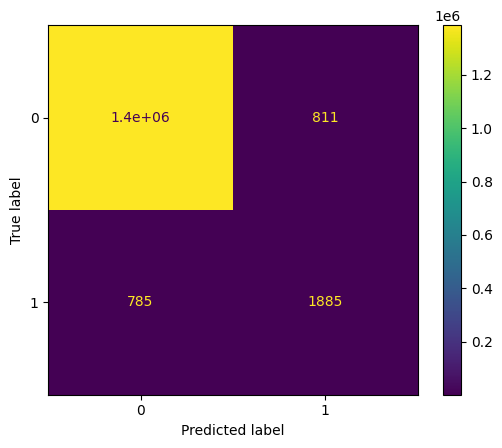

In [52]:
 cm = confusion_matrix(y_test, Y_pred_dt, labels=decision_tree.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decision_tree.classes_)
 disp.plot()

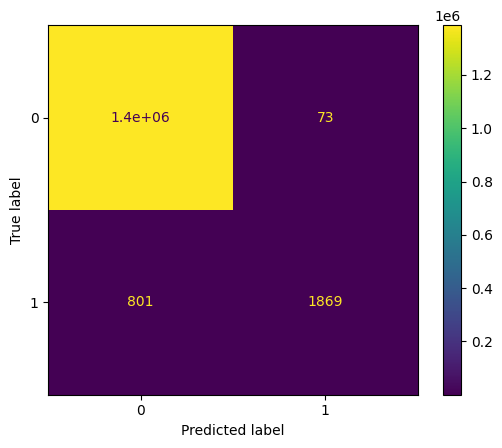

In [53]:
 cm = confusion_matrix(y_test, Y_pred_rf, labels=random_forest.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
 disp.plot()

In [58]:
print("Classification Report of Decision Tree")
classification_report_dt = classification_report(y_test, Y_pred_dt)
print(classification_report_dt)

Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1387002
           1       0.70      0.71      0.70      2670

    accuracy                           1.00   1389672
   macro avg       0.85      0.85      0.85   1389672
weighted avg       1.00      1.00      1.00   1389672



In [59]:
print("Classification Report of Random Forest")
classification_report_rf = classification_report(y_test, Y_pred_rf)
print(classification_report_rf)

Classification Report of Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1387002
           1       0.96      0.70      0.81      2670

    accuracy                           1.00   1389672
   macro avg       0.98      0.85      0.91   1389672
weighted avg       1.00      1.00      1.00   1389672



Observation: F1 - score is more for random_forest compared to decision tree. So random_forest is able to generalize fake and real data very well.

In [70]:
df_fraud = df_customers[df_customers['isFraud']=='1']
df_fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,C1305486145C553264065
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,181.00,21182.00,C840083671C38997010
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0,2806.00,0.00,C1420196421C972765878
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0,2806.00,26202.00,C2101527076C1007251739
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0,20128.00,0.00,C137533655C1848415041
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0,20128.00,-5877.85,C1118430673C339924917
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0,0.00,-9291517.62,C749981943C667346055
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0,1277212.77,0.00,C1334405552C431687661
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0,1277212.77,-2444985.19,C467632528C716083600
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0,35063.63,0.00,C1364127192C1136419747


<Axes: xlabel='type', ylabel='count'>

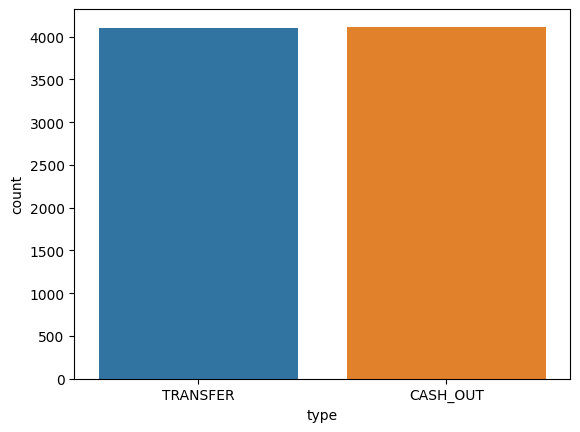

In [71]:
sns.countplot(x='type', data = df_fraud)

Observation: All the fraudulent transactions are based on Transfer and cash out type


### What are the key factors that predict fraudulent customer?

The source of request is secured or not ?

Is the name of organisation asking for money is legit or not ?

Transaction history of vendors and amount of current transaction.


### What kind of prevention should be adopted while company update its infrastructure?

Need to use 3 factor authentication like that

Use smart phones apps wisely which provides security. 

Browse through secured websites.

use secure browser and Use secured internet connections .

Keep your mobile and laptop with security apps.

Don't respond to unwanted calls/SMS(s/E-mails.

contact your bank immidiately, if the transaction is fradulant.



###Assuming these actions have been implemented, how would you determine if they work?

Bank sending E-statements and special warning if the transaction seems fradulant.

Customers keeping a check of their account activity.

Always keep a log of your payments and nofity the bank if fradulant transaction occurs.
